<a href="https://colab.research.google.com/github/ArthurSMg/ArthurSMg/blob/main/Ex1_ArthurMagalhaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXERCICIOS AULA 1 
#Arthur Magalhaes (12629595)


##Parte 1

In [8]:
set.seed(12629595) #Gerando a seed do nusp
v <- runif(20,1,5) #definindo o vetor
print(v)

#Agora vamos calcular algumas estatisticas de v

min(v)
max(v)
median(v)
sd(v)
sum(v)

 [1] 3.029639 3.422614 1.463995 2.713766 4.514376 2.794798 4.256028 2.295637
 [9] 1.259830 2.263262 2.693148 1.660486 3.832076 2.239175 3.021199 4.105690
[17] 1.311840 2.184657 3.778315 1.326588


[1] 1.25983

[1] 4.514376

[1] 2.703457

[1] 1.031176

[1] 54.16712

In [9]:
#Agora vamos fazer um calculo

print(2*exp(-log(12629595)))

#Vamos construir as matrizes pedidas

A <-  matrix(c(2,1,3,4,5,6,7,8,9),3)
print(A)

B <-  matrix(c(1,4,3,3,2,2,3,2,3),3)
print(B)


[1] 1.583582e-07
     [,1] [,2] [,3]
[1,]    2    4    7
[2,]    1    5    8
[3,]    3    6    9
     [,1] [,2] [,3]
[1,]    1    3    3
[2,]    4    2    2
[3,]    3    2    3


In [10]:
#Agora vamos fazer o calculo pedido com as matrizes

print(t(A)%*%B)
print(solve(A)%*%solve(B))
print(solve(A%*%B))


     [,1] [,2] [,3]
[1,]   15   14   17
[2,]   42   34   40
[3,]   66   55   64
            [,1]       [,2]       [,3]
[1,] -0.53333333 -0.5333333  1.0000000
[2,]  0.33333333 -1.0000000  0.6666667
[3,] -0.06666667  0.7666667 -0.6666667
           [,1]       [,2]       [,3]
[1,] -0.5666667  0.2333333  0.2333333
[2,] -1.8000000 -0.2000000  1.4666667
[3,]  2.1000000 -0.1000000 -1.4333333


In [11]:
#Agora vamos simular os numeros aleatorios e criar um loop para verificar quantos sao maiores que 0.5

n <- seq(0,1,1/100)
#print(n)

length(n[n>0.5]) #como podemos ver foi 50 como esperado, ja que a distribuicao é uniforme

[1] 50

In [12]:
#Agora vamos criar uma funcao para calcular a funcao sigmoide e sua integral


sigmoide = function(x){1/(1+exp(-x))}

integrate(sigmoide,-5,5)

5 with absolute error < 5.6e-14

## PARTE 2

In [13]:
#primeiramente vamos ler o arquivo fornecido

dados <- read.table(file="berlind2006tab3M20.txt", header = TRUE)

dim(dados) #checando a dimensao do arquivo
colnames(dados) #vendo suas variaveis

[1] 4107   11

[1] "Samp"  "Group" "ra"    "dec"   "z"     "R"     "Mrtot" "gmr"   "sigma"
[10] "RPerp" "Redge"

In [14]:
#agora vamos examinar a coluna da riqueza (R) e fazer os calculos estatisticos dos seus valores

quantile(dados$R)
min(dados$R)
max(dados$R)
mean(dados$R)
sd(dados$R)
sum(dados$R)


0%  25%  50%  75% 100% 
   3    3    4    5  132

[1] 3

[1] 132

[1] 5.168493

[1] 5.110837

[1] 21227

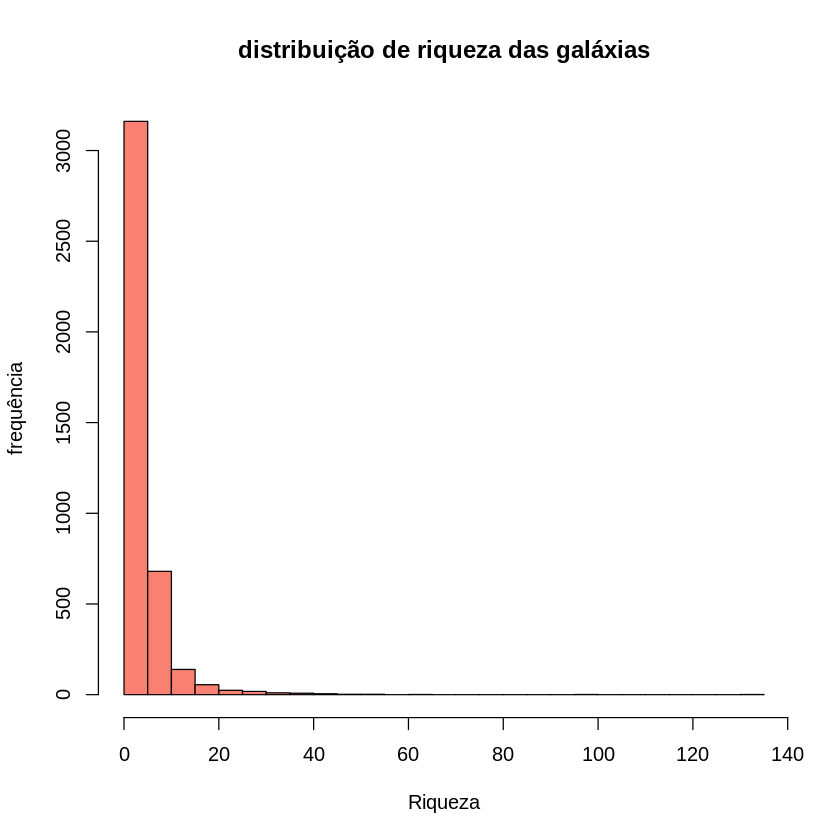

In [15]:
# Agora vamos fazer um histograma com os dados para ter uma representaçao visual melhor.

hist(dados$R,main="distribuição de riqueza das galáxias",breaks=20,xlab='Riqueza', ylab= 'frequência',col='salmon')

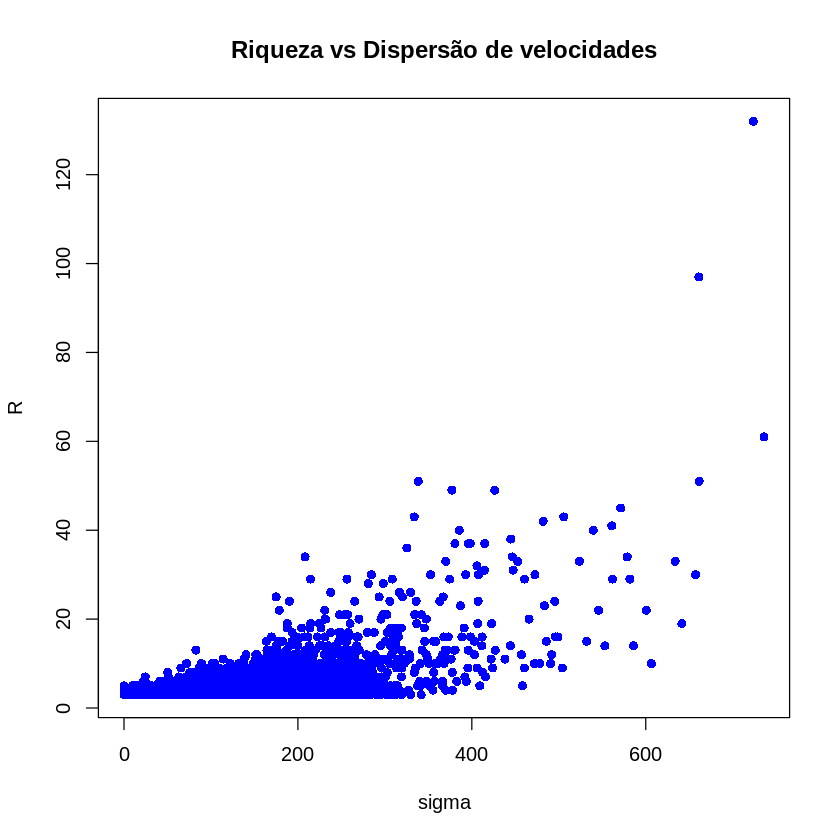

In [49]:
# Agora vamos fazer os graficos de riqueza com a dispersão de velocidades (sigma
# Vamos comparar as coordenadas lineares com logarítmicas
#library(latex2exp)
library(ggplot2)

x <- dados$sigma
y <- dados$R

plot(x,y,xlab="sigma",ylab = "R" ,col="blue",pch=16,main="Riqueza vs Dispersão de velocidades")


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“96 x values <= 0 omitted from logarithmic plot”


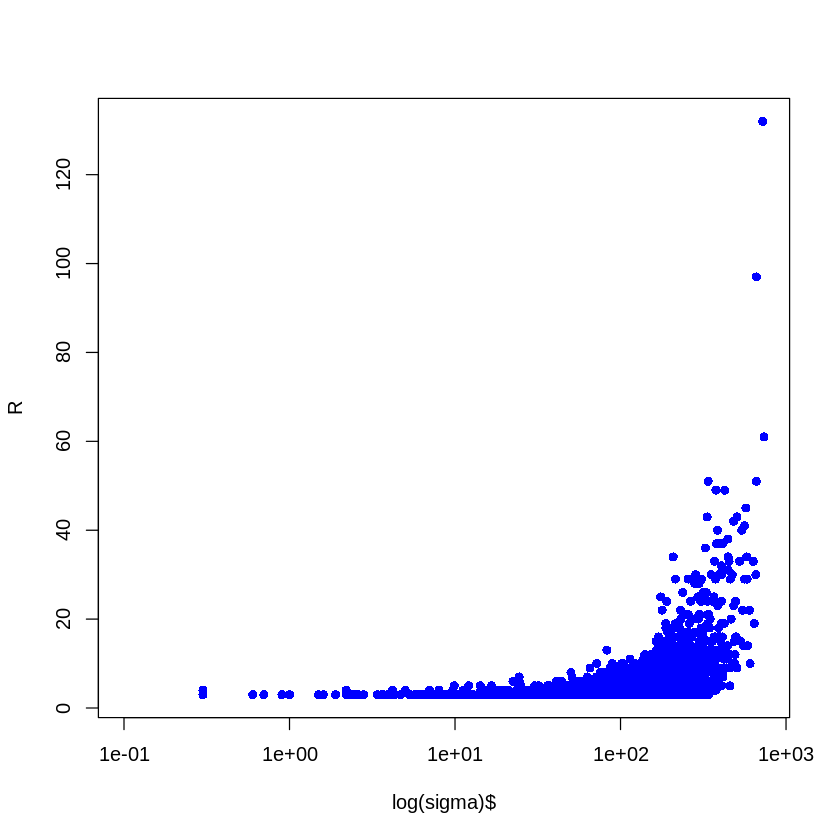

In [50]:
#par(mfrow=c(1,2))

plot(x,y,log = 'x', xlab = "log(sigma)$",xlim=c(0.1,max(x)),ylab='R', col= "blue", pch=16) 

#coloquei os limites em um valor pequeno proximo de 0 para eliminar os valores <= 0


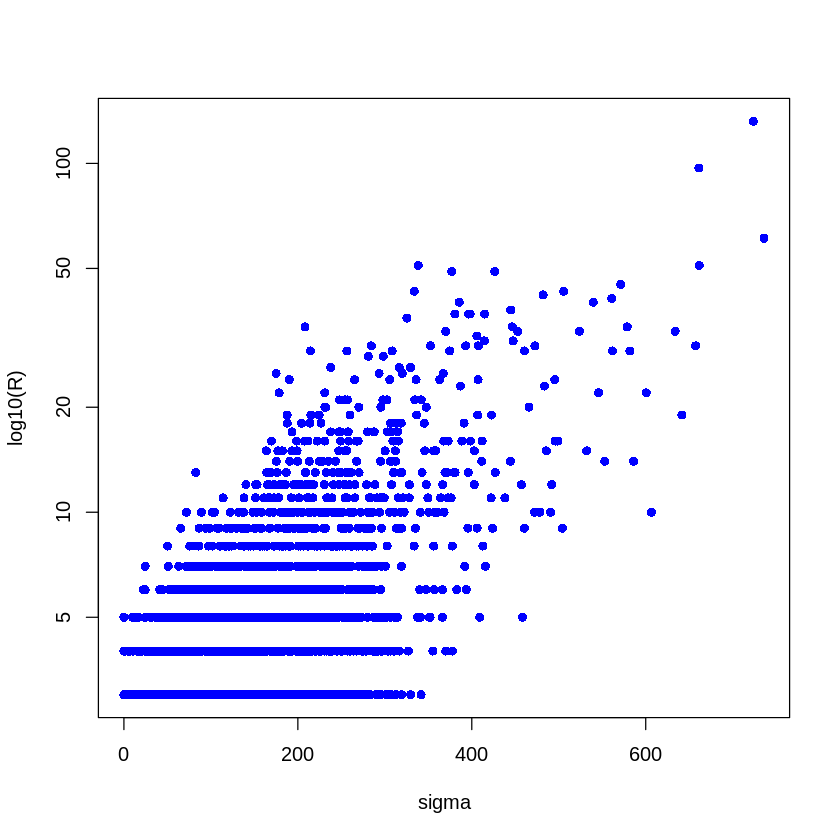

In [20]:
plot(x,y,log = 'y',ylab = "log10(R)",xlim=c(0.1,max(x)),xlab='sigma', pch= 16, col = 'blue')


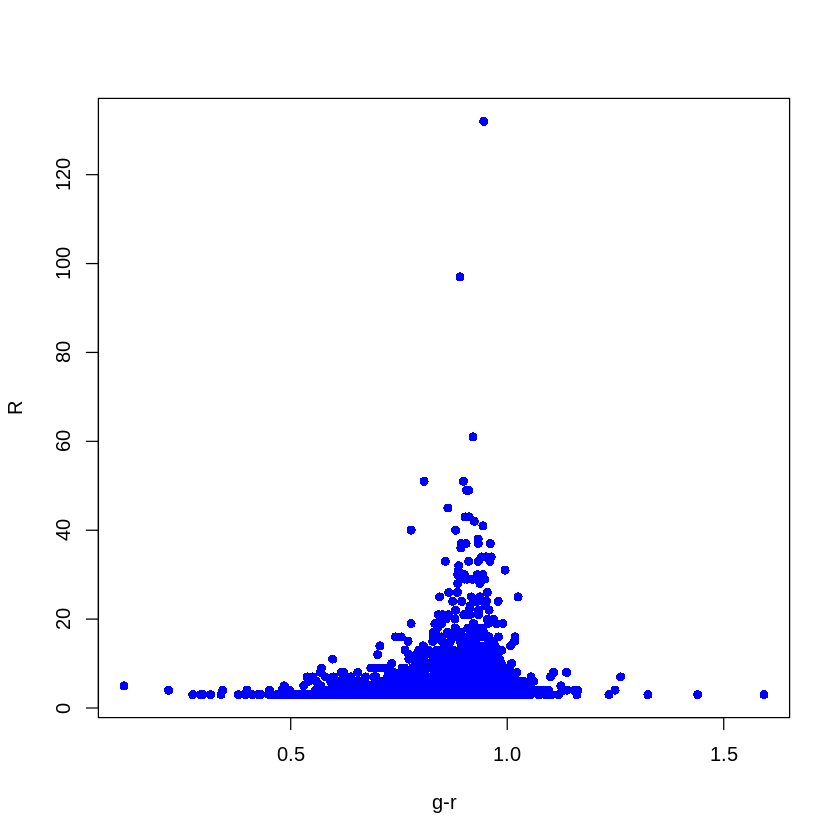

In [21]:
#Agora vamos ver a relacao entre a riqueza(R) e a cor g-r(gmr)
#Para isso vamos fazer plots entre os dois

x1 <- dados$gmr
y1 <- y

plot(x1,y1,ylab = 'R', xlab = 'g-r', col= 'blue', pch=16)



In [22]:
#Agora vamos calcular a media da riqueza para poder separar entre os grupos
#acima (ricos) e os abaixo (pobres) desta media

print(paste0('Mediana da riqueza:', median(dados$R)))


[1] "Mediana da riqueza:4"


In [62]:
#Portanto sistema ricos tem R>4 e sistemas pobres R<4

#Definindo o sistemas ricos
rich = y[y>=4]
print(rich)

   [1] 132  97  61  51  51  49  49  45  43  43  42  41  40  40  38  37  37  37
  [19]  37  36  34  34  34  33  33  33  33  32  31  31  30  30  30  30  30  30
  [37]  29  29  29  29  29  29  29  28  28  26  26  26  25  25  25  25  24  24
  [55]  24  24  24  24  24  23  23  22  22  22  22  21  21  21  21  21  21  21
  [73]  20  20  20  20  20  20  19  19  19  19  19  19  19  19  18  18  18  18
  [91]  18  18  18  18  18  17  17  17  17  17  17  17  17  17  17  16  16  16
 [109]  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
 [127]  16  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
 [145]  15  15  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14
 [163]  14  14  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13
 [181]  13  13  13  13  13  13  13  13  13  13  13  13  13  12  12  12  12  12
 [199]  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
 [217]  12  12  12  12  12  12  12  12  12  12  12  

In [61]:
#Definindo os sitemas pobres
poor= y[y<4]
print(poor)


   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [297] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [371] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [408] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [445] 3 3 3 3 3 3 3 3 3 3 3

In [25]:
# Agora vamos fazer um loop para encontrar o index de quando os numeros menores que 4 comecam a aparecer  aparecer na coluna de riqueza
# Desta forma poderemos separar a coluna de cor em dois data frames de tamanhos iguais ao de galaxias pobres e ricas
# fazendo com que seja possivel encontrar a mediana da cor para cada um deles
num = 0
for (l in dados$R){
        if(l>=4){num = num+1}
                else{break}
}

print(num)

[1] 2205


In [26]:
#podemos conferir pedindo para printar este index
print(y[2205])
print(y[2206])

[1] 4
[1] 3


In [27]:
print(paste0("media de cor das galaxias ricas: ",median(x1[1:2205])))
print(paste0("media de cor das galaxias pobres: ",median(x1[2206:4107])))


[1] "media de cor das galaxias ricas: 0.885"
[1] "media de cor das galaxias pobres: 0.854"


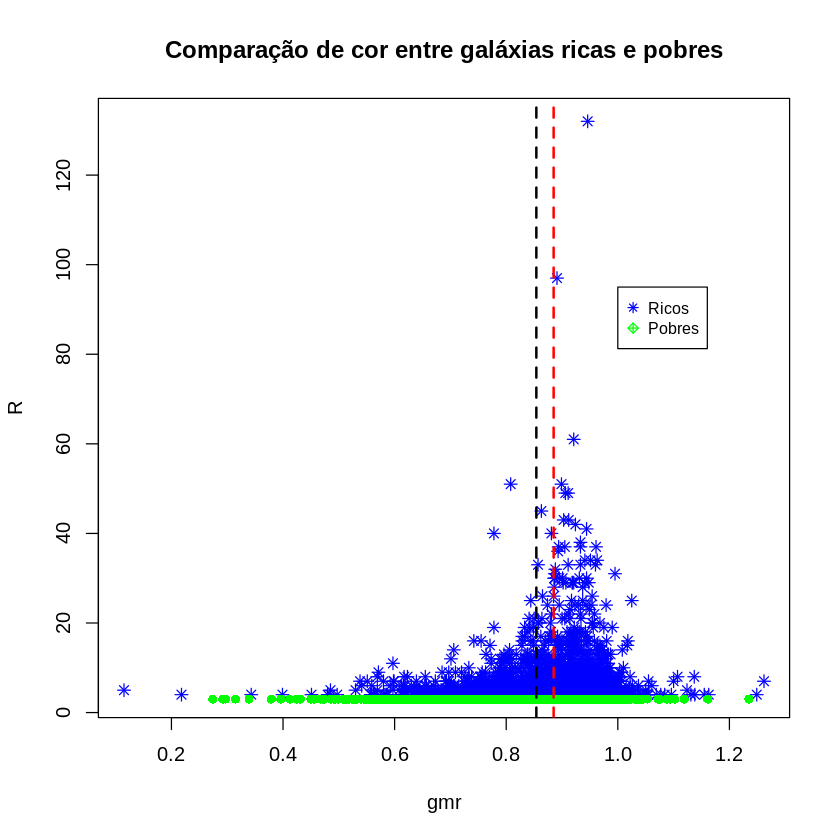

In [100]:
plot(x1[1:2205],rich, col = "blue", xlab = "gmr",ylab = "R", pch=8, main="Comparação de cor entre galáxias ricas e pobres")
points(x1[2206:4107], poor, col = "green", pch= 16)
abline(v = median(x1[1:2205]), col="red", lwd=2, lty=2)
abline(v = median(x1[2206:4107]), col="black", lwd=2, lty=2)

legend(1, 95, legend=c("Ricos", "Pobres"),
       col=c("blue", "green"), pch = 8:16, cex=0.8)

No grafico temos ambas populações plotadas versus a cor, juntamente com as retas pontilhadas em preto e vermelho que representeam a mediana da cor da população de galáxias pobres e ricas respectivamente.

Podemos perceber então que as galáxias mais ricas (R>5) tendem a ter  um excesso de cor maior, principalmente em torno de 0.88 com um pico muito grande das mais ricas ainda (R>20) em torno de g-r = 1.  

Portanto galáxias mais ricas tendem a ter um maior avermelhamento, possívelmente devido ao material interestelar e de sua formação.

In [102]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Ex1_ArthurMagalhaes_12629595.ipynb'

ERROR: ignored